### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

**Task 1:** When was the global search for 'workout' at its peak? Save the year of peak interest as a string named year_str in the format "yyyy".

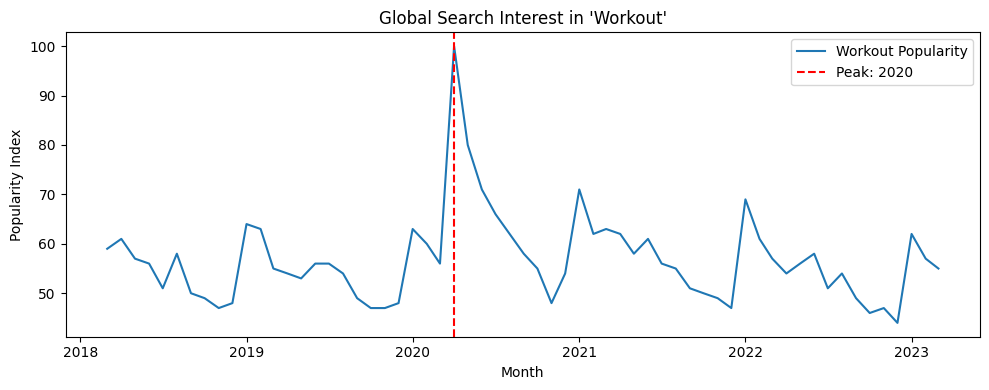

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
workout_df = pd.read_csv("data/workout.csv")
workout_df['month'] = pd.to_datetime(workout_df['month'])

# Find the peak month and year
peak_month = workout_df.loc[workout_df['workout_worldwide'].idxmax(), 'month']
year_str = str(peak_month.year)

# Plot workout trend
plt.figure(figsize=(10, 4))
plt.plot(workout_df['month'], workout_df['workout_worldwide'], label='Workout Popularity')
plt.axvline(peak_month, color='red', linestyle='--', label=f'Peak: {year_str}')
plt.title("Global Search Interest in 'Workout'")
plt.xlabel("Month")
plt.ylabel("Popularity Index")
plt.legend()
plt.tight_layout()
plt.show()


**Task 2:** Of the keywords available, what was the most popular during the covid pandemic, and what is the most popular now? Save your answers as variables called peak_covid and current respectively.

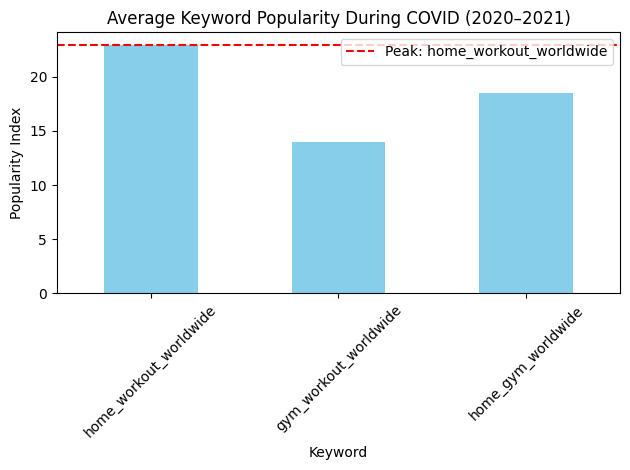

In [7]:
# Load data
three_keywords_df = pd.read_csv("data/three_keywords.csv")
three_keywords_df['month'] = pd.to_datetime(three_keywords_df['month'])

# Filter COVID period
covid_df = three_keywords_df[
    (three_keywords_df['month'] >= '2020-03') & (three_keywords_df['month'] <= '2021-12')
]

# Compute averages and find most popular
covid_means = covid_df[[
    'home_workout_worldwide',
    'gym_workout_worldwide',
    'home_gym_worldwide'
]].mean()

peak_covid = covid_means.idxmax()

# Plot bar chart
covid_means.plot(kind='bar', color='skyblue')
plt.title("Average Keyword Popularity During COVID (2020–2021)")
plt.ylabel("Popularity Index")
plt.xlabel("Keyword")
plt.xticks(rotation=45)
plt.axhline(covid_means.max(), color='red', linestyle='--', label=f"Peak: {peak_covid}")
plt.legend()
plt.tight_layout()
plt.show()


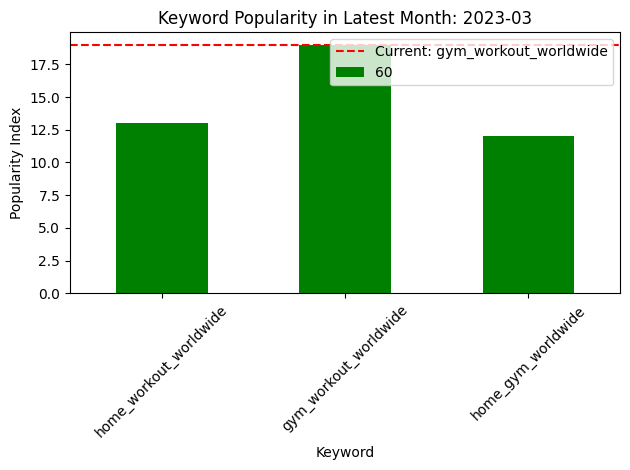

In [8]:
# Get latest month’s data
latest_row = three_keywords_df.loc[three_keywords_df['month'].idxmax()]
current_vals = latest_row[[
    'home_workout_worldwide',
    'gym_workout_worldwide',
    'home_gym_worldwide'
]]

# Ensure numeric values
current_vals = pd.to_numeric(current_vals, errors='coerce')

# Identify keyword with highest current popularity
current = current_vals.idxmax()

# Plot current keyword values
current_vals.plot(kind='bar', color='green')
plt.title(f"Keyword Popularity in Latest Month: {latest_row['month'].strftime('%Y-%m')}")
plt.ylabel("Popularity Index")
plt.xlabel("Keyword")
plt.xticks(rotation=45)
plt.axhline(current_vals.max(), color='red', linestyle='--', label=f"Current: {current}")
plt.legend()
plt.tight_layout()
plt.show()


**Task 3:** What country has the highest interest for workouts among the following: United States, Australia, or Japan? Save your answer as top_country.

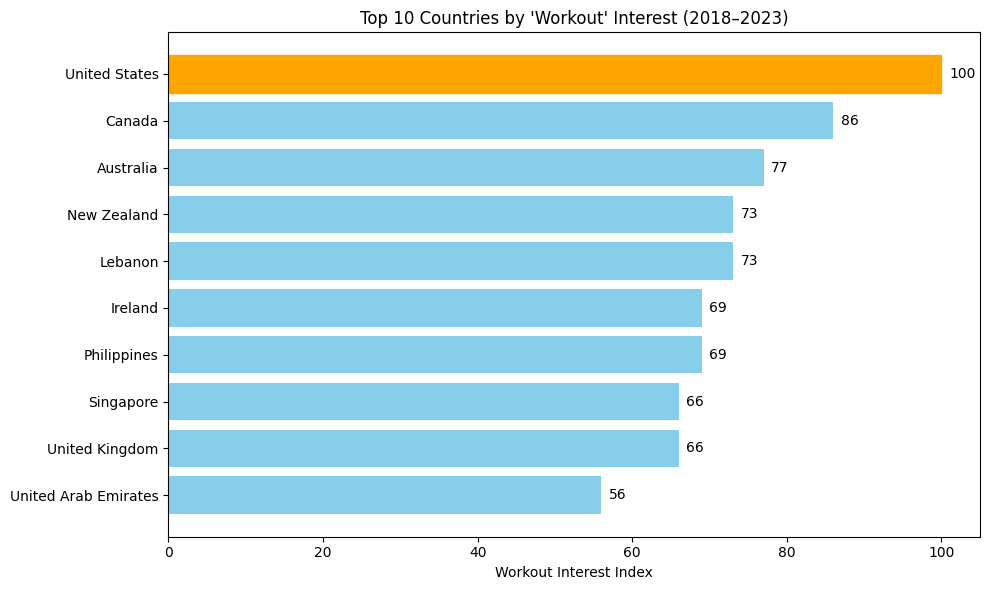

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
workout_geo_df = pd.read_csv("data/workout_geo.csv")

# Find the country with the highest interest
top_country = workout_geo_df.loc[
    workout_geo_df['workout_2018_2023'].idxmax(), 'country'
]

# Sort and get top 10 countries by interest
top_10_countries = workout_geo_df.sort_values(
    by='workout_2018_2023', ascending=False
).head(10)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(
    top_10_countries['country'], 
    top_10_countries['workout_2018_2023'], 
    color='skyblue'
)
plt.gca().invert_yaxis()  # Highest on top
plt.title("Top 10 Countries by 'Workout' Interest (2018–2023)")
plt.xlabel("Workout Interest Index")

# Highlight the top country in a different color
for bar, country in zip(bars, top_10_countries['country']):
    if country == top_country:
        bar.set_color('orange')

# Annotate bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width:.0f}', va='center')

plt.tight_layout()
plt.show()


**Task 4:** You'd be interested in expanding your virtual home workouts offering to either the Philippines or Malaysia. Which of the two countries has the highest interest in home workouts? Identify the country and save it as home_workout_geo.

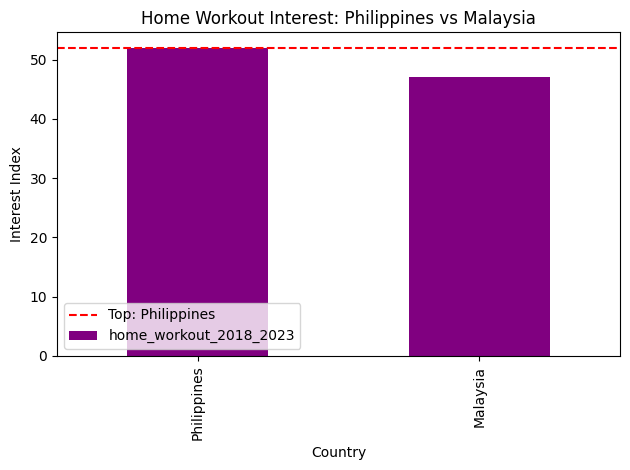

In [10]:
# Filter for Philippines and Malaysia
home_workout_df = three_keywords_geo_df[
    three_keywords_geo_df['Country'].isin(['Philippines', 'Malaysia'])
]

# Get the country with higher home workout interest
home_workout_geo = home_workout_df.set_index('Country')['home_workout_2018_2023'].idxmax()

# Plot
home_workout_df.set_index('Country')['home_workout_2018_2023'].plot(kind='bar', color='purple')
plt.title("Home Workout Interest: Philippines vs Malaysia")
plt.ylabel("Interest Index")
plt.axhline(
    home_workout_df['home_workout_2018_2023'].max(),
    color='red', linestyle='--', label=f"Top: {home_workout_geo}"
)
plt.legend()
plt.tight_layout()
plt.show()
